# Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# Insert Data

In [39]:
data = pd.read_csv("/content/Crop Production data.csv")

In [40]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# EDA

In [41]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [43]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [44]:
season = data['Season'].unique()
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [45]:
district = data['District_Name'].unique()
len(district)

646

In [46]:
Years = data['Crop_Year'].unique()
Years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [47]:
states = data['State_Name'].unique()
print(states)

print('''
============================================================================================
''')

print("Numbers of states for which dataset is availabe are: ", len(states))

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


Numbers of states for which dataset is availabe are:  33


In [48]:
Crop = data['Crop'].unique()
l = len(Crop)
print(Crop)
print(f"Total number of crops: {l}")

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


# Visualization

In [49]:
data_copy = data.dropna()

In [50]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

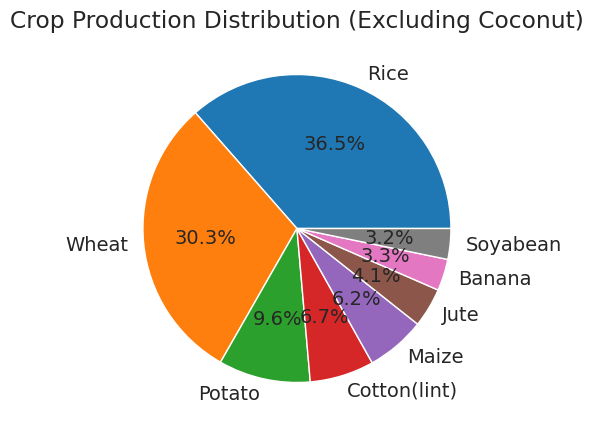

In [51]:
new_d = data_copy.groupby('Crop')['Production'].sum().reset_index()
sorted_new_d = new_d.sort_values(by= 'Production', ascending = False)
sorted_new_d
pie_plot_data = sorted_new_d[2:10]
crop_name = pie_plot_data['Crop']
Production_value = pie_plot_data['Production']
plt.pie(Production_value, labels = crop_name, autopct='%1.1f%%')
plt.title('Crop Production Distribution (Excluding Coconut)')

plt.show()

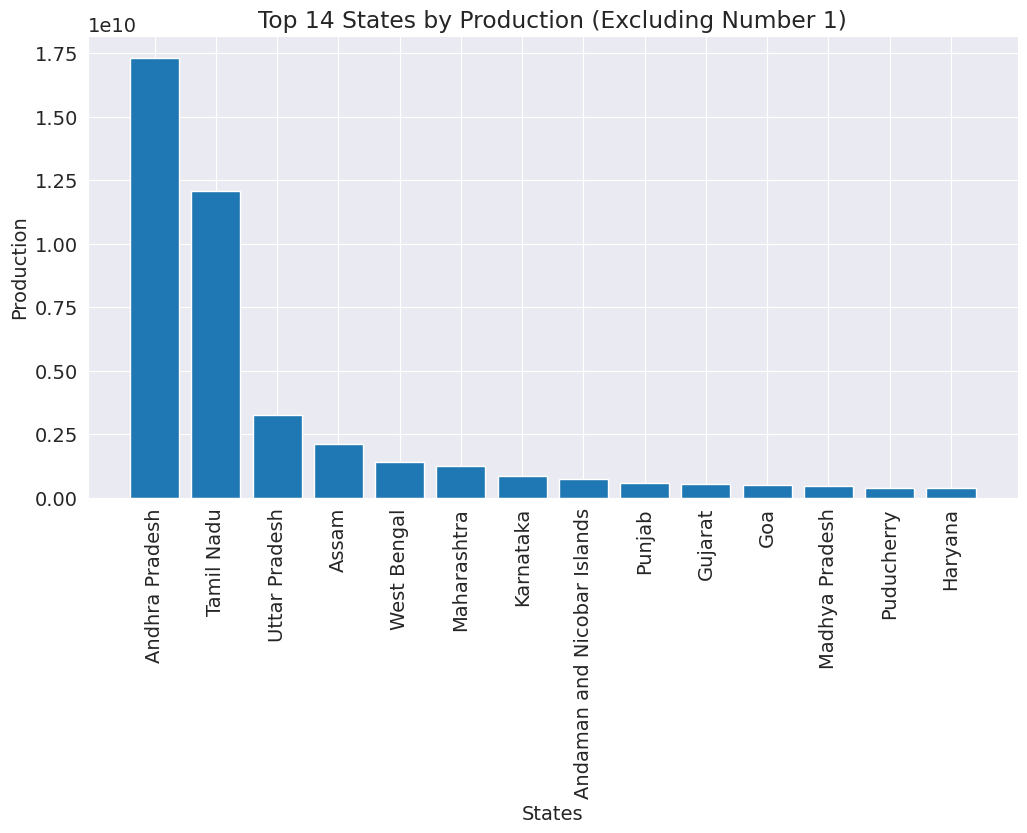

In [52]:
state_production = data_copy.groupby('State_Name')['Production'].sum()
state_production_sorted = state_production.sort_values(ascending = False)
top_15_states = state_production_sorted.head(15)
top_14_states = top_15_states[1:]

plt.figure(figsize = (12,6))
plt.bar(top_14_states.index, top_14_states.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

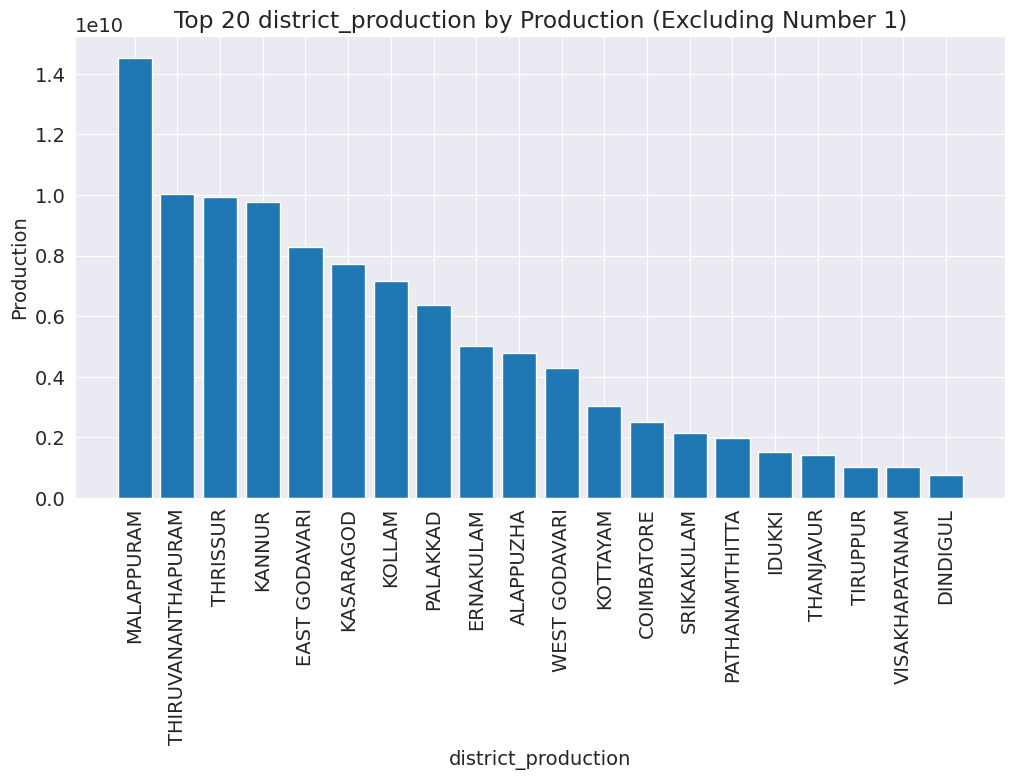

In [53]:
district_production = data_copy.groupby('District_Name')['Production'].sum()
district_production_sorted = district_production.sort_values(ascending = False)
top_21_district_production = district_production_sorted.head(21)
top_20_district_production = top_21_district_production[1:]

plt.figure(figsize = (12,6))
plt.bar(top_20_district_production.index, top_20_district_production.values)
plt.xlabel('district_production')
plt.ylabel('Production')
plt.title('Top 20 district_production by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

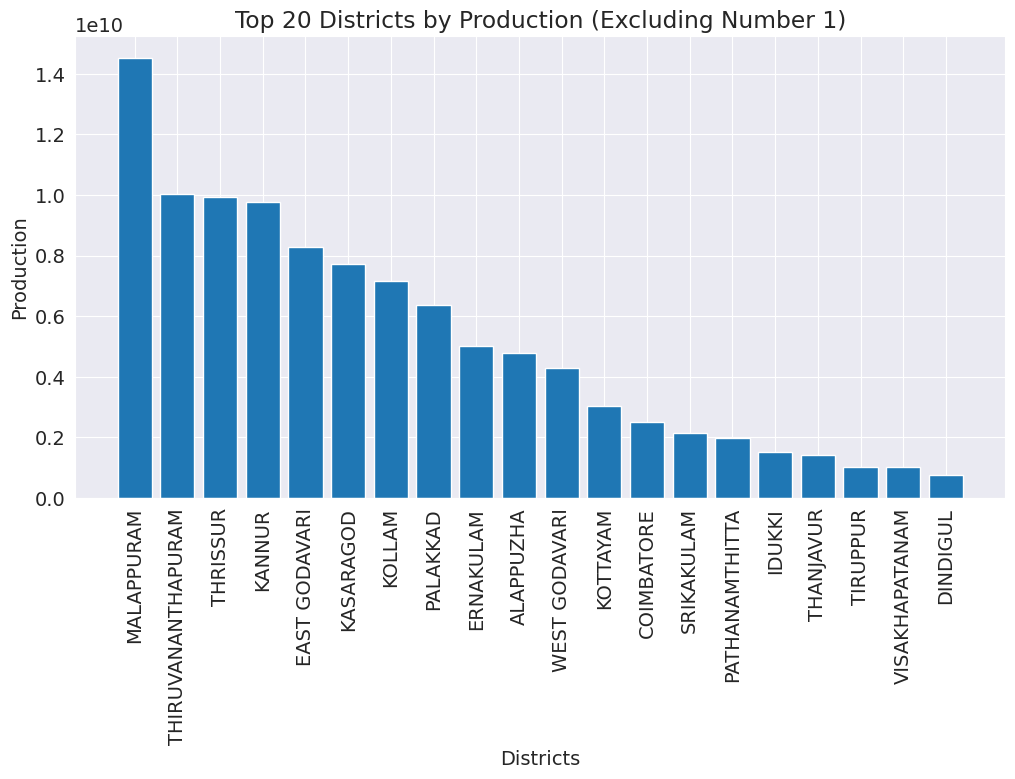

In [61]:
district_production = data_copy.groupby('District_Name')['Production'].sum()

sorted_districts_desc = district_production.sort_values(ascending=False)

top_21_districts_desc = sorted_districts_desc.head(21)

top_20_districts_desc = top_21_districts_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_20_districts_desc.index, top_20_districts_desc.values)
plt.xlabel('Districts')
plt.ylabel('Production')
plt.title('Top 20 Districts by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

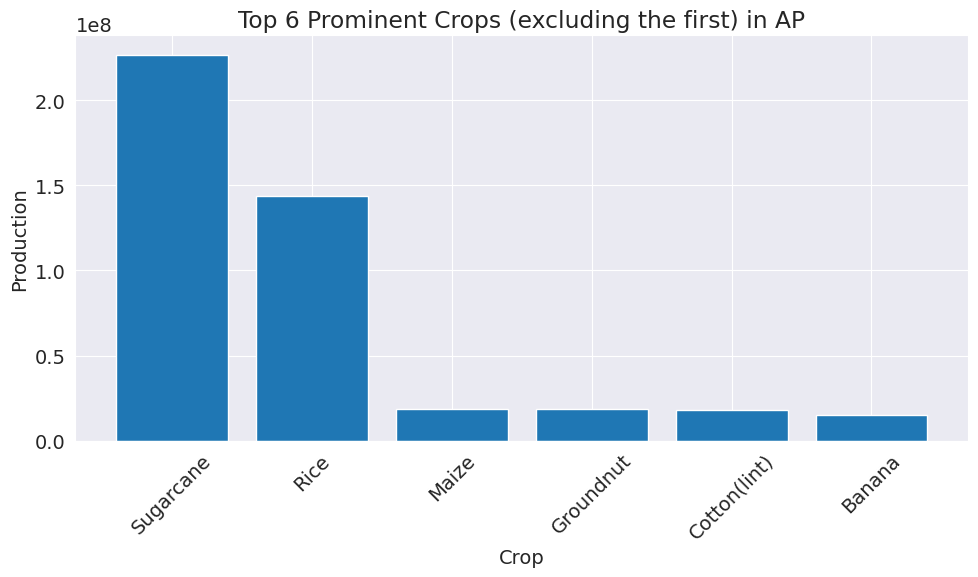

In [63]:
df1 = data_copy
kerala_data = df1[df1['State_Name'] == 'Andhra Pradesh']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in AP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
temp = data_copy.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production',color = 'State_Name')

In [59]:
temp = data_copy.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')